# Project: Dynamic Fund Protection - Simulations and Pricing Methods

**By: Victor Felipe Gontijo - Quantitative research intern - BNP Paribas - Paris**

**Proposed by: Jean-Philippe Lemor - Head of systematic strategies and hybrids quantitative research team - BNP Paribas - Paris**

**July 2020**

## Dynamic Fund Protection

In this project, we aim to implement some ideas presented in the paper:

*Junich Imai, Phelim P. Boyle, Dynamic fund protection. With a discussion by Hans U. Gerber and Elias S. W. Shiu (July, 2001)*

We develop here the main concepts involving a derivative product, named *Dynamic Fund Protection*. We intend, therefore, to properly define *Dynamic Fund Protections* as a class of financial products and, along with this definition, we also discuss some motivations around their most common uses and, present pricing methods for them. At a second moment, we develop and show some computational tools that allow us to numerically calculate prices for a *Dynamic Fund Protection*, as well as, to simulate its performance under different market outcomes.

## Context

In this day and age, when individuals and instituitions get more and more access to information, they also tend to be increasingly concerned about their future, as well as, the choices they can make, to effectively plan it. In this perspective, financial planning has become a major issue in today's societies and, individuals and institutions are more and more encouraged to look for financial solutions that meet their particular needs, aspirations and future projects.

Finance is more than ever adressed with the problem to develop new custom-designed products, fucused on dealing with different kinds of risk, time horizons, and expected returns. The product we present here, the *Dynamic Fund Protection*, was first introduced by: *Gerber and Shiu (1998, 1999)*. It was initially conceived for portfolios based in units/shares of investment funds and, designed to provide protection against downwards moves affecting the value of those units/shares.

Investiment funds have been, for a long while, a great alternative, when it comes to get exposition to financial investments. It makes investments much more accessible to general investors and, as a consequence, they reveal themselves as important means of collecting imense quantities of capital, which are immediately driven to reincorporate the economical activity and enhance the potential of the market. As an exemple, we may imagine the huge economical impact of the well-knowns american pension-funds.

Investment funds also serve as important tools to regroup several market actors that share the same investment strategies. It makes much easier and effective to track an index, or to invest in small-caps, for example. A fact is: each kind of fund has its own profile, which makes sometimes hard for a particular investor to find a fund meeting exactly his requirements. In order to provide a solution for this issue, many insurance and banking companies have been looking at those requirements and developing more custom products that make them more achievable.

Let's approach the "retirement-problem", in order to draw an example. This example will lead us to understand a context and a motivation for developing Dynamic Fund Protections.

One looking to make financial plannings on his own retirement, is someone who considers to invest, in a long-term perspective, a small part of his periodic income, during the most part of his life. For sure, this person also expects those long-term returns to be certain and high enough to provide him, when he no longer intends to work. 

For many years, those in a such position would surely look for pension-funds with conservative characteristics. As interest rates have become low, however, such returns have been no longer expected to be "high enough" and people looking for retirement options started shifting to funds with more risky characteristics. Well, with the risk factor as a contrast, the expected returns have became no longer "certain" as they were. 

## Motivation

A Dynamic Fund Protection is a financial product designed for someone who intends to limit his losses against downwards moves that may eventually affect the value of his units, in some investment fund. More than this, the product is also designed to allow such a person to profit, at any time, from the appreciation on the value of his units.

When we think about downside protection, it is very natural to think about Put Options. In the context of the example, European Put Options are even more natural to think, once people have usually a determined retirement date. Dynamic Fund Protection, as we may see, works as an extension of a European Put. 

Payoffs of European Put options are completely determined by the underlying's price at the maturity date. It implies that, different underlying's paths, with equal prices at the maturity, will have exactly the same payoff. This characteristic is sometimes not desirable and Dynamic Fund Protections addresses a solution for it, making upside profits equally possible.

The following image shows the price evolution of units of a ETF, tracking the *S&P 500* index. Let's imagine a person that decided to make his own financial planning for retirement. For this purpose, this person buys some units of the following ETF, as a way of tracking the *S&P 500*, but the person also buy European Put Options with strike $K$, on the index options, as a form of downside protection.

<img src="files/Scenario1.png">

Evidently, neither would this person profit from his Put Option potential concerning downwards moves, nor would he profit from the market's great recovery. As we may see later, a porfolio with units of the correspondent ETF and a Dynamic Fund Protection, having this ETF as underlying, is designed to be very performant in this scenario.

## The *Protected Portfolio*

Let $[0,T]$ be the interval in which we want to define a derivative named Dynamic Fund Protection. Consider $T$ to be its maturity date and the only exercise date allowed. Before defining this derivative, we will first explore a new concept: the *protected portfolio*.

Let $I$ be the interval $[0,T]$, then consider two stochastic processes $S = \{S_t\}_{t \in I}$ and $F = \{F_t\}_{t \in I}$. For every $t \in I$, $S_t$ and $F_t$ are random variables defined over a same probability space $(\Omega ,{\mathcal {F}},P)$. $S$ and $F$ will represent the value of two different portfolios over time:

<br/>
<dl>
  <dd>$S$: represents the value of a portfolio composed by $1$ unit of a given investment fund.</dd>
  <dd>$F$: represents the value of the "protected portfolio", which is initially composed only by $1$ unit of the same investment fund.</dd>
</dl>

Let $K$ be a function of time, defined over $[0,T]$. $K$ may be a deterministic function or even a stochastic process. Intuitively, $K$ is intended to serve as a protection floor.

We want to build the **protected portfolio**, such that, the following properties hold:

<br/>
<dl>
  
  <dd>$(a)$: $F(0) = S(0)$.</dd>
  <dd>$(b)$: If $t \in [0,T]$ and $F_t > K_t$ $\Rightarrow \frac{dF_t}{F_t} = \frac{dS_t}{S_t}$</dd>
  <dd>$(c)$: If $t \in [0,T]$, $F_t = K_t$, and $\frac{dS_t}{S_t} \geq 0$ $\Rightarrow \frac{dF_t}{F_t} = \frac{dS_t}{S_t}$<dd>
  <dd>$(d)$: If $t \in [0,T]$, $F_t = K_t$, and $\frac{dS_t}{S_t} < 0$ $\Rightarrow \frac{dF_t}{F_t} = 0$
  
</dl>

Those properties mean that: whenever $S$ is above $K$, $F$ follows the same dynamics of $S$, in other words, they have the same instantaneous rate of return. On the opposite situation, when $S$ is below $K$, we have two different outcomes: either $S$ has a positive instantaneous rate of return, and so does $F$, with the same magnitude, or $S$ has negative instantaneous rate of return, and $F$ does not change its value.

Consider some given subset $H \subseteq [0,T]$. We will call *monitoring points* the elements of $H$.

Note that the properties we listed imply: $F_s \geq K_s$, for every $s \in H$.

Although those properties above can be intuitively understood and really help us capture the main ideia of the *protected portfolio* we want to build, they are not mathematically precise. We mean "not precise", in the sense that, $dS_t$ and $dF_t$ are not mathematically defined. For this reason, we will choose an elegant, broader and simpler definition:

The **protected portfolio** is defined as portfolio such that, at any instant $t\in [0,T]$:

\begin{equation*}
\ F_t = S_t\max(1, \max\limits_{s \in [0,t]}\frac{K_s}{S_s} )
\label{eq:def_continuous} \tag{1.0}
\end{equation*}

The processes $S$ and $F$ may also be defined only over a finite discrete set of *monitoring points*: $H \subseteq [0,T]$. In this case we use following definition for the **protected portfolio**:

\begin{equation*}
\ F_t = S_t\max(1, \max\limits_{s\leq t: s \in H}\frac{K_s}{S_s} )
\label{eq:def_discrete} \tag{1.1}
\end{equation*}

for any instant $t\in H$.

We invite the reader to play with these last definitions and convince himself that they really match all the intuitive properties we expected.

**In practice**, such a *protected portfolio* could be constructed by the following procedure:

<br/>
<dl>
  
  <dd>(1) Define a set $H$ of *monitoring times* and start a portfolio with 1 unit of a given investment fund.</dd>
  <dd>(2) At every *monitoring time* $t$ , check the value of this portfolio.</dd>
  <dd>(3) If this value is below $K_t$: buy enough units of the fund, such that: the total new value of the portfolio is now equal to $K_t$. <dd>
  
</dl>

Evidently, this is not a self-financing strategy. 

In the practical aspect, we can regard the construction of a *protected portfolio* as a strategy that can be as interesting for clients, like we show at the last section (try to imagine how a protected portfolio would perform in the scenario of the last image), as it can be for banks, who can sell them in exchange for a certain premium.

## The Unit Value as a Stochatic Process $S$

We have defined $S$ as a general stochastic process over $[0,T]$. For the purposes of the theory and the applications we intend to develop in this project, we investigate Dynamic Fund Protections under the assumption $S$ is a difusion process, fitting the following general form:

\begin{equation*}
\ \it{dS_t} = \mu_t S_t\it{dt} + \sigma_t S_t\it{dW_t}
\label{eq:risky_dynamics} \tag{2}
\end{equation*}

We will also consider the filtration $\{\mathcal {F_t}\}_{t \in I}$ generated by the Brownian Motion. As a consequence of the definition $S_t$ is $\mathcal {F_t}$-measurable.

**Note**:
The reader should note, for example, that the stochastic differential equation above only have a mathematical sense when regarded as an integral equation:

$\it{dS_t} = \mu_t S_t\it{dt} + \sigma_t S_t\it{dW_t}$ means $S$ is a stochastic process that satifies : $S_{t+u} - S_t = \int_t^{t+u}S_v\mu_v\it{dv} + \int_t^{t+u}S_v\sigma_v\it{dW_v}$ over some considered domain.

Let $t,u \in I$, the integrals above are well-defined and have the following meanings:

For each $\omega \in \Omega$, we have a map $A_\omega$ from $[t, t+u]$ to $\mathbb{R}$, such that, $A_\omega: v \mapsto S_v(\omega)\mu_v(\omega)$. If, for every $\omega \in \Omega$, each $A_\omega$ is continuous almost everywhere, so $\int_t^{t+u}S_v(\omega)\mu_v(\omega)$ is a well-defined Riemman-Integral. In this case, $\int_t^{t+u}S_v\mu_v\it{dv}$ is constructed "path-wise" and it is a well-defined random variable over $(\Omega ,{\mathcal {F}},P)$. 

If $S\sigma$ is adapted to the filtration generated by the Brownian Motion and it belongs to $L^2(\Omega \times [0,T])$, thus $\int_t^{t+u}S_v\sigma_v\it{dW_v}$ is a well-defined Ito's integral, with respect to the Brownian Motion. The integral $\int_t^{t+u}S_v\sigma_v\it{dW_v}$ is also a random variable over $(\Omega ,{\mathcal {F}},P)$, but is defined as a $L^2$ limit, rather than "path-wise" like the first one. 

## Simulations of $F$ and $S$ (supposed to be a Geometric Brownian Motion)

In order to gain some intuition about the *protected portfolio* we have just defined, we will play some simulations, so we can see how it is expected to behave in different market outcomes.

For the first group of simulations, we consider $K$ being a constant function of time and we also consider $S$ following a Geometric Brownian Motion. This means equation 2.0 gets reduced to the simpler case in which $\mu_t \equiv \mu $ and $\sigma_t \equiv \sigma$, with $\mu$ and $\sigma$ constants.

This is the simplest case we could treat, and that's why we start with it. In sequence, we will develop a pricing method for a Dynamic Fund Protection under these conditions, and then, we will progressively consider more complex cases.

### General Parameters of the Investment

In [1]:
#Investment Horizont - Years
years = 5

#Annual interest rate
r = 0.1

#Initial value of a single unit
S_0 = 2.5

### Protected Portfolio Parameters

In [2]:
# K  -(constant barrier)
K = 2

# Number of times per day the portfolio is monitored 
checks_per_day = 10

In [3]:
# Code parameters
import numpy as np

dt = 1/(365*checks_per_day)
size = int(years/dt) + 1
checking_instants = np.array(range(0,size))*dt

### Model Parameters - Geometric Brownian Motion

In [4]:
# Drift
mu = -0.04

# Volatility
sigma = 0.2

In [5]:
#### Importing file "Dynamic_Fund_Protection.py"

In [6]:
from Dynamic_Fund_Protection import plot
from Dynamic_Fund_Protection import plot_superimpose
from Dynamic_Fund_Protection import Geometric_Brownian_Motion
from Dynamic_Fund_Protection import Gen_K
from Dynamic_Fund_Protection import Gen_F

### Simulating a Geometric Brownian Motion path of $S$, over the chosen period

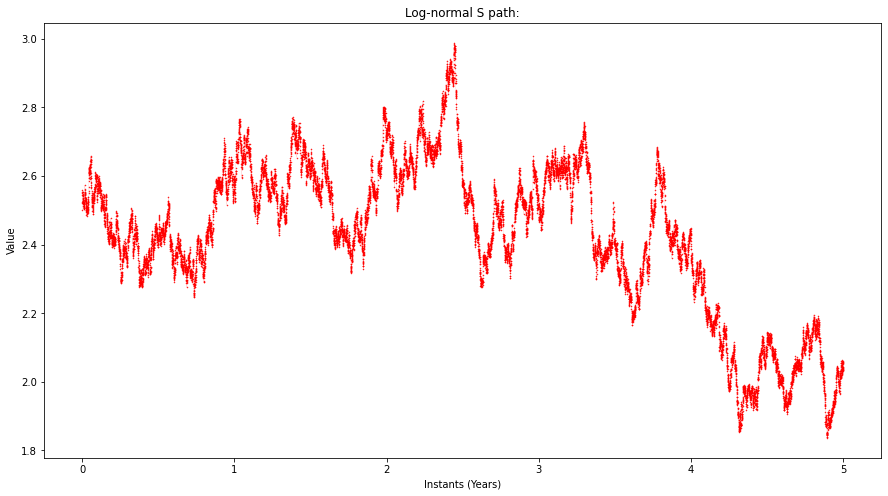

In [7]:
S = Geometric_Brownian_Motion(S_0, mu, sigma, checking_instants)
plot('Log-normal S path:', S, dt, 'red', 'Log-normal S path')

### Determining the correspondent path of $F$, with respect to the simulated path of $S$, over the chosen period

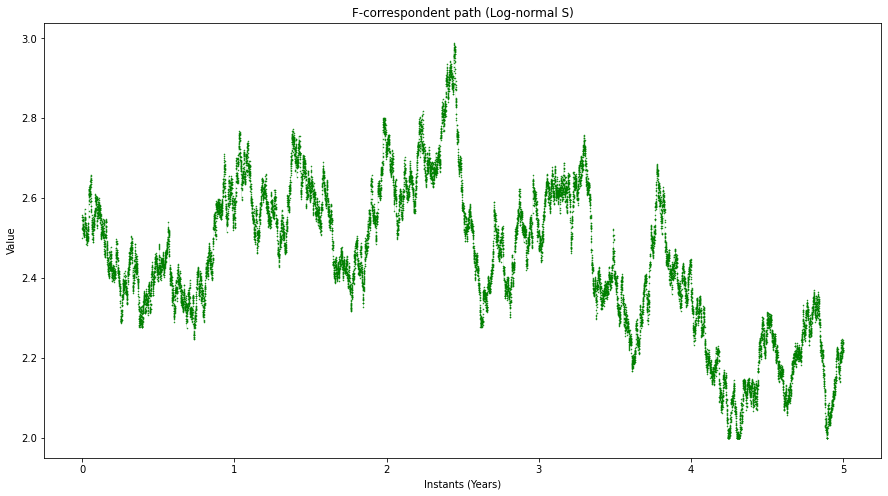

In [8]:
K_floor = Gen_K(K, checking_instants)
F = Gen_F(S,K)

plot('F-correspondent path (Log-normal S)', F, dt, 'green', 'F-correspondent path (Log-normal S)')

### Comparison between $S$ and the *protected portfolio* $F$, over the chosen period

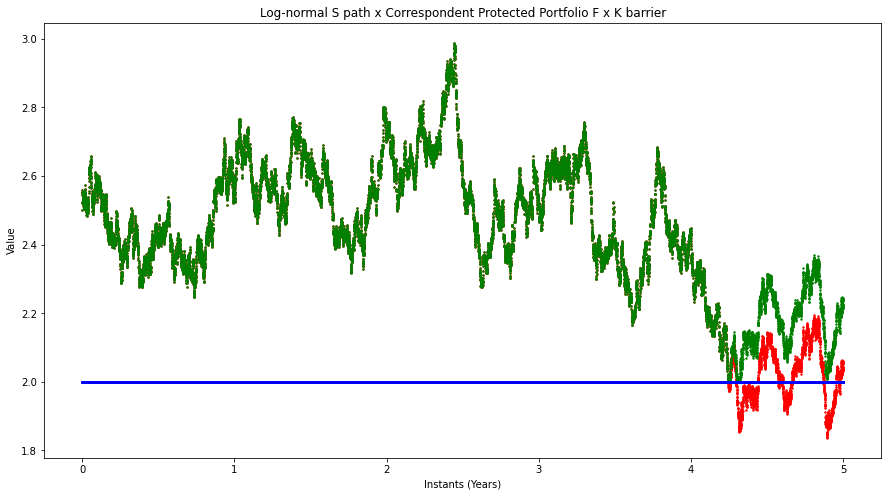

In [9]:
plot_superimpose('Log-normal S path x Correspondent Protected Portfolio F x K barrier', 'Log-normal S path x Correspondent Protected Portfolio F x K barrier', S , F, K_floor, dt)

In [10]:
l = len(S)
print('Absolute difference in the final values between the "protected" and "non-protected" portfolio: ' + str(F[l-1] - S[l-1]))
print('Relative difference in the final values between the "protected" and "non-protected" portfolio: ' + str((F[l-1] - S[l-1])/S[l-1]))

Absolute difference in the final values between the "protected" and "non-protected" portfolio: 0.18155256236315598
Relative difference in the final values between the "protected" and "non-protected" portfolio: 0.08921651853038716


## Dynamic Fund Protections

We define now a derivative named Dynamic Fund Protection. This derivative has $S$ as its underlying asset and $T$ as its maturity, which is, in fact, its only exercise date.

Let $X = \{X_t\}_{t \in I}$ be the stochastic process defined $I$, representing the value of such a Dynamic Fund Protection, with underlying $S$ and maturity $T$.

So far, we have discussed the processes $S$ and $F$. Indeed, $X$ is defined to be a derivative such that: at the maturity $T$, it has the following payoff: 

\begin{equation*}
\ X_T = F_T - S_T
\label{WQ_def} \tag{3}
\end{equation*}

When we discussed the *protected portfolio* and how it can be constructed *in practice*, we also discussed why it could be an interesting financial product both for buyers and sellers. Note however, that constructing a *protected portfolio* by the procedure we showed, can be indeed, even more difficult. As it is not a self-financing strategy it requires the seller to have always available liquidities during the investment period. Another negative point is that the transaction costs may be not negligeable.

Those difficults show that even *protected portfolios* are interesting financial products, in theory, it can become  costly to construct them in practice. Well, the Dynamic Fund Protection, as we defined, provides an easy solution for this issue. With a Dynamic Fund Protection one can now replicates the payoff of a theoretical *protected portfolio* defined over a desired investment period, without the necessity of constructing such portfolio in real. For this, the buyer could simply buy a simple unit of a chosen fund and a Dynamic Fund Protection for the same fund and the same maturity.

## Pricing Dynamic Fund Protections

In order to price Dynamic Fund Protections, that is, to determine a premium for which a bank or any other seller should be willing to sell a Dynamic Fund Protection, we will use the concepts of non-arbitrage pricing and, neutral risk valuation.

We first develop the theoretical framework of Neutral Risk Valuation for general derivatives, and then, we apply these ideias speciffically to Dynamic Fund Protections. 

   ### Neutral Risk Valuation - General Framework

#### First Assumptions

Let $V = \{V_t\}_{t \in I}$ be a stochastic process defined in $I$, representing the value of a general derivative of $S$ over that period. The payoff generated by this derivative depends on the particular path followed by $S$. By the non-arbitrage principle, at the maturity date $T$, $V_T$ is necessarly equal the payoff of the derivative. 

Let $r = \{r_t\}_{t \in I}$ be a stochastic process defined $I$, representing the instantaneous spot interest rate over that period. 

$V$ and $r$ are defined over $(\Omega ,{\mathcal {F}},P)$ and considered $\{\mathcal {F_t}\}_{t \in I}$-adapted.

Let us now suppose the existence of a stochastic process $\Delta = \{\Delta_t\}_{t \in I}$, also defined in $I$, such that:

<br/>
<dl>
  
  <dd>(1) $\Delta$ is $\{\mathcal {F_t}\}_{t \in I}$-adapted.</dd>
  <dd>(2) $\Delta$ defines a self-financing portfolio in $I$. At any instant $t\in I$, this self-financing portfolio is composed by: $\Delta_t$ shares of $S$ and the rest is invested/borrowed from a money-market account.</dd>
  <dd>(3) At any instant $t\in I$, this self-financing portfolio is a perfect hedge for a short position taken in the derivative.<dd>
  
</dl>

Those properties mean that: If $\Delta$ exists, one can exactly replicate the payoff of the derivative by constructing the described self-financing portfolio. By the non-arbitrage principle, at instant $t\in I$, the value of self-financing portfolio should be equal to $V_t$.

The existence of a process $\Delta$ can be proved with the Martingale Representation Theorem. Under this assumption, the relation between the value of the self-financing portfolio and $V$ implies:

\begin{equation*}
\ \it{dV_t} = \Delta_t \it{dS_t} + r_t(V_t - \Delta_tS_t)\it{dt}
\label{eq:risky_dynamics} \tag{3}
\end{equation*}


#### The Discounted Value of S  and V

Let $D = \{D_t\}_{t \in I}$ be a stochastic process defined in $I$, representing the discounting factor between $0$ and $t\in I$.

\begin{equation*}
\ D_t := exp( -\int_0^{t}r_u\it{du} ) 
\label{discounting_def} 
\end{equation*}

At the instant $t\in I$, the discounted value of $S$ is $D_tS_t$, and we are interested at the dynamics of this process. $DS$ is the exponential of an Ito's Process, and with the use of Itô's formula we can deduce these dynamics under the probablity space $(\Omega ,{\mathcal {F}},\mathbb{P})$:

\begin{equation*}
\ \it{d}(D_tS_t) = \sigma_tD_tS_t[\Theta_t\it{dt} + \it{dW_t}] 
\label{discounted_s_diff} \tag{4.0}
\end{equation*}

where $\Theta$ is another process called *risk premium process*, defined by:

\begin{equation*}
\ \Theta_t := \frac{\mu_t - r_t}{\sigma_t} 
\label{theta_def} 
\end{equation*}

In order to determine the dynamics of the discounted value of $V$, we proceed by substituting equation (2) in equation (3). By doing this, we see that $V$ is indeed an Itô's process and the same is true for the product $DV$. Applying the Itô's formula for the product we get to a very similar relation:

\begin{equation*}
\ \it{d}(D_tV_t) = \Delta_t\sigma_tD_tS_t[\Theta_t\it{dt} + \it{dW_t}] 
\label{discounted_v_diff} 
\end{equation*}

that can be simplified to:

\begin{equation*}
\ \it{d}(D_tV_t) = \Delta_t\it{d}(D_tS_t)
\label{discounted_vxs_diff} \tag{4.1}
\end{equation*}

#### Change of Measure - Girsanov's Theorem

We will now define a new stochastic process $Z = \{Z_t\}_{t \in I}$, which will be used to construct a new probability measure $\mathbb{Q}$ over $\mathcal {F}$, equivalent to $\mathbb{P}$:

\begin{equation*}
\ Z_t := exp(-\int_0^t \Theta_u\it{dW_u} - \frac{1}{2}\int_0^t \Theta_u^2\it{du}) 
\label{Z_def} 
\end{equation*}

Under the assumption that the process $\Theta$ satisfies the Novikov's condition, that is: $\mathbb{E}[exp ( \frac{1}{2}\int_0^t \Theta_u^2\it{du})$$]$ $< \infty$ :

The Girsanov Theorem says that $Z$ is a martingale under the measure $\mathbb{P}$. In particular, it ensures that: $\mathbb{E}[Z_T] = Z_0 = 1$.

This allows us to construct a new measure $\mathbb{Q}$, such that: $\frac{\it{d}\mathbb{Q}}{\it{d}\mathbb{P}} = Z_T$, where $\frac{\it{d}\mathbb{Q}}{\it{d}\mathbb{P}}$ is a Radon-Nikodym derivative. $Z_T$ is also a positive random variable, which implies $\mathbb{Q}$ and $\mathbb{P}$ are equivalent mesures over $\mathcal {F}$.

The Girsanov Theorem states that the process $W^\mathbb{Q}$, defined below, is a is a Brownian Motion under the measure $W^\mathbb{Q}$:

\begin{equation*}
\ W_t^\mathbb{Q} := W_t + \int_0^t \Theta_u \it{du}
\tag{5.0}
\end{equation*}

Well, this is a game-changing result. When applied to equation (4.0) it gives the dynamics of the discounted value of $S$, under the new mesure $\mathbb{Q}$:

\begin{equation*}
\ \it{d}(D_tS_t) = \sigma_tD_tS_t\it{d}W_t^\mathbb{Q} 
\tag{5.1}
\end{equation*}

Acording to these new dynamics, $DS$ and $DV$ are martingales under the measure $\mathbb{Q}$, which we call **neutral-risk measure**. The martingale property ensures that:

\begin{equation*}
\ D_tV_t = \mathbb{E}^Q [D_T V_T | \mathcal{F}_t] 
\tag{5.2}
\end{equation*}

In particular, 

\begin{equation*}
\ V_0 = \mathbb{E}^Q [exp( -\int_0^{T}r_u\it{du} )V_T ] 
\tag{5.3}
\end{equation*}

noting that $V_T$ is equal to the payoff at the maturity date.

### Pricing of Dynamic Fund Protections under the Black-Scholes Framework 

In the last section, we have underlined the main ideas concerning the principles of non-arbitrage pricing and neutral-risk valuation. It has been done under the framework of a general diffusion process with stochastic interest rates.

Here we apply those ideas in the classical framework of Black-Scholes. In this context, $S$ is supposed to follow a Geometric Brownian Motion and we have a constant interest rate $r$. 

In our approach, we only consider the simplest case, in which $K$ is constant and pre-determined barrier, but this approach can be also generalized for more complex kinds of barrier.  

#### Rewriting the Payoff

Let $\{M_t\}_{t \in I}$ be a processus $\{\mathcal {F_t}\}_{t \in I}$-adapted, defined as:

\begin{equation*}
\ M_t = \max(1, \frac{K}{\min\limits_{s \in [0,t]} S_s} )
\label{eq:def_M} 
\end{equation*}

This definition allows us to rewrite equation (1.0). For any $t \in I$, we can observe $S$ before and after $t$. More than this, $F_T$ can be determined by comparing the observed results in each one of these two different intervals:

\begin{equation*}
\ F_T = S_T\max(M_t, \frac{K}{\min\limits_{s \in [t,T]} S_s} )
\label{eq:FT_rewriting} 
\end{equation*}

We can rewrite this equation, one more time. Making this comparison still more evident:

\begin{equation*}
\ F_T = S_TM_t +  S_T(\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+
\label{eq:FT_rewriting2} 
\end{equation*}

We use the last equation to write the payoff $X_T$ of the Dynamic Fund Protection, only in function of $S$:

\begin{equation*}
\ X_T = S_T\{M_t - 1 + (\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+ \}
\tag{6}
\end{equation*}

As $M_t$ is $\mathcal {F_t}$-measurable, for any $t \in I$, the last equation shows exactly how the payoff $X_T$ is affected in terms of known information, represented by $\mathcal {F_t}$, and the future information, that we still do not know.

**Note:** If we consider the case of a Dynamic Fund Protection discretely monitored, the results obtained so far are pretty much the same.

#### Change of Numéraire and Construction of a New Martingale Measure

By hypothesis, the instantaneous spot interest rate $r$ is constant and $S$ follows log-normal dynamics under the  real-world measure $\mathbb{P}$: 

$$\it{dS_t} = \mu S_t\it{dt} + \sigma S_t\it{dW_t}$$

An idea one could naturally have is to look at the Neutral-Risk Measure $\mathbb{Q}$, under which, the discounted value of $S$ is a martingale. This is what we have done in the general framework of neutral-risk valuation, and by doing this, one would get to a particular version of equation (5.2)

\begin{equation*}
\ X_t = e^{-r(T-t)}\mathbb{E}^Q [X_T | \mathcal{F}_t]
\tag{7.0}
\end{equation*}

We also know $S$ follows the following dynamics under the Neutral-Risk Measure $\mathbb{Q}$:

$$\it{dS_t} = rS_t\it{dt} + \sigma S_t\it{d}W_t^\mathbb{Q}$$

When one tries to plug equation (6) inside the conditional expectation of equation (7.0), one gets an non-trivial expectation to calculate analytically. One should also note that: the payoff $X_T$ is, in fact, $S_T$ multiplied by a random factor. This suggests we should maybe use $S$ as a numéraire to express the values of the Dynamic Fund Protection over time.

Following this intuition, we will use a similar idea to the one we used on the general neutral-risk approach. We will look, therefore, for a measure $\mathbb{Q}_s$, under which, the relative price of $X$, with respect to $S$, is a martingale. This should should allow us to determine $X_t$ in terms of a conditional expectation under $\mathbb{Q}_s$, that we expect to be easier to deal with. This technique is known as "change of numéraire".

We will now define a new stochastic process $G = \{G_t\}_{t \in I}$, which will be used to construct a new probability measure $\mathbb{Q}_s$ over $\mathcal {F}$, equivalent to $\mathbb{Q}$:

$$ G_t := exp(\sigma W_t^\mathbb{Q} - \frac{1}{2}\sigma^2t) = \frac{S_t}{e^{rt}S_0}$$

Note that, $G$ is always positive and $G$ is also a martingale over $\mathbb{Q}$. The martigale property comes from the fact that the discounted value of $S$ is a martingale over $Q$. It immediatelly implies that $\mathbb{E}^Q [G_T] = 1$. 

In this context, we define $\mathbb{Q}_s$ such that:

$$\frac{\it{d}\mathbb{Q}_s}{\it{d}\mathbb{Q}} = G_T$$

where $\frac{\it{d}\mathbb{Q}_s}{\it{d}\mathbb{Q}}$ is a Radon-Nikodym derivative.

Let $t,u \in I$ such that: $t < u$. Let Y be some $\mathcal{F}_u$-measurable random variable. The definitions of $\mathbb{Q}_s$ and $G$, as well as, the latter's martingale property imply the following equality:

$$ \mathbb{E}^{Q_s}[ Y | \mathcal{F}_t] = \frac{1}{G_t}\mathbb{E}^{Q}[ YG_u | \mathcal{F}_t] $$

Well, throughout this equality we can easily show that $\frac{X}{S}$ is a martingale under the new measure $\mathbb{Q}_s$. This gives us a pricing formula for the Dynamic Fund Protection:

\begin{equation*}
\ X_t = S_t\mathbb{E}^{Q_s} [\frac{X_T}{S_T} | \mathcal{F}_t]
\tag{7.1}
\end{equation*}

By the Girsanov's Theorem, we know that the process $W_t^{\mathbb{Q}_s} := W_t^\mathbb{Q} - \sigma t$ is a Brownian Motion under the the measure $\mathbb{Q}_s$. It implies that $S$ has the following dynamics under the new measure:

\begin{equation*}
\ \it{dS_t} = (r + \sigma^2)S_t\it{dt} + \sigma S_t\it{d}W_t^{\mathbb{Q}_s}
\tag{7.2}
\end{equation*}

**Note:** Again, if we consider the case of a Dynamic Fund Protection discretely monitored, the results obtained so far are pretty much the same.

#### Continuous Monitoring - Analytic Solution

In order to derive an analytic solution for the "pricing-problem" of a Dynamic Fund Protection, under the Black-Scholes framework, one needs to express $\mathbb{E}^{Q_s} [\frac{X_T}{S_T} | \mathcal{F}_t]$ with some analytical formula. In more complexes frameworks, that is not an easy task and, most times we cannot even be sure if it is possible. 

Fortunatelly, under the Black-Scholes framework, we can derive an analytic solution for Dynamic Fund Protections continuously monitored. Of course, such products cannot exist in practice, once the units of a fund cannot be continously quoted. From the Mathematical perspective, however, such idealisation allows use to use some powerful results of the theory of stochastic processes over continuous time, such as the distribution of the minimum value of a geometric brownian, over a given interval. 

By pluging equation (6) in equation (7.0) we obtain:

\begin{equation*}
\ X_t = S_t \mathbb{E}^{Q_s} [M_t - 1 + (\frac{K}{\min\limits_{s \in [t,T]} S_s} - M_t)^+  | \mathcal{F}_t]
\tag{8.0}
\end{equation*}

Which can be split in:

\begin{equation*}
\ X_t = S_t\{M_t - 1\} + S_t\mathbb{E}^{Q_s}[\frac{K}{\min\limits_{s \in [t,T]} S_s} \mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}}  | \mathcal{F}_t] - S_tM_t\mathbb{E}^{Q_s} [\mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}} | \mathcal{F}_t]
\tag{8.1}
\end{equation*}

where $\mathbb{1}_{\{A\}}(\omega)$ is the indicator function. It values $1$ if $\omega \in A$ and $0$ otherwise.

Let $\mu^* := r + \frac{\sigma^2}{2}$ and $\tau := T-t$. 

The cumulative distribuition function of $\min\limits_{s \in [t,T]} S_s$ under $\mathbb{Q}_s$ is given$^{[1]}$ by:

\begin{equation*}
\ F(x) = \mathbb{Q}_s (\min\limits_{s \in [t,T]}S_s \leq x   | S_t ) = \Phi(\frac{-\mu^*\tau + log(\frac{x}{S_t})}{\sigma \sqrt{\tau}}) + (\frac{S_t}{x})^{\frac{-2\mu^*}{\sigma^2}}\Phi(\frac{\mu^*\tau + log(\frac{x}{S_t})}{\sigma \sqrt{\tau}})
\tag{8.2}
\end{equation*}

defined for $0 < x \leq S_t$.

F(x) is differentiable over its domain of definition. We will call $F'$ its derivative, which is, in fact, the density of the $\min\limits_{s \in [t,T]} S_s$ distribution.

Note that the second expectation is straightfoward to calculate with the cumulative distribution:
$$\mathbb{E}^{Q_s} [\mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}} | \mathcal{F}_t] = \mathbb{Q}_s (\min\limits_{s \in [t,T]}S_s \leq \frac{K}{M_t} | S_t ) = F(\frac{K}{M_t})$$

By definition of $M$, it is clear that $M_t \geq \frac{K}{S_t}$, which implies that: $\frac{K}{M_t}$ is inside the domain of $F$.

Once $F'$ is the density of $\min\limits_{s \in [t,T]} S_s$, the first expectation can be expressed by:

$$ \mathbb{E}^{Q_s}[\frac{K}{\min\limits_{s \in [t,T]} S_s} \mathbb{1}_{\{\frac{K}{\min\limits_{s \in [t,T]} S_s} \geq M_t\}}  | \mathcal{F}_t] = \int_{0}^{\frac{K}{M_t}} F'(x)\frac{K}{x} \it{dx} $$

$$ = M_tF(\frac{K}{M_t}) + \int_{0}^{\frac{K}{M_t}} KF(x)\frac{1}{x^2} \it{dx}$$

The integral $\int_{0}^{\frac{K}{M_t}} F(x)\frac{1}{x^2} \it{dx}$ can be calculated using the substitution $x = S_te^v$ and then integrating by parts. The following result is extremelly useful for the calculation: $\int_{-\infty}^b \Phi(c_1 + c_2v)e^{-c_3v} \it{dv} = \frac{1}{c_3}exp(\frac{1}{2}(\gamma^2 - c_1^2))\Phi(\gamma + c_2b) - \frac{1}{c_3}exp(-c_3b)\Phi(c_1 + c_2b)$, with $\gamma := c_1 + \frac{c_3}{c_2}$ .

*Junich Imai and Phelim P. Boyle* present in their paper an elegant final formula, that correspond to equation (8.1) after calculating both expectations, as we sugested:

\begin{equation*}
\ X_t = S_t\{M_t\Phi(d_1) - 1\} + \frac{K}{R}(\frac{K}{M_tS_t})^R\Phi(d_2) + (1 - \frac{1}{R})Ke^{r\tau}\Phi(d_3)
\tag{8.3}
\end{equation*}

Here, $R:= \frac{2r}{\sigma^2}$ and:

$$\ d_1 := \frac{ -log(\frac{K}{M_tS_t}) + r\tau + \frac{1}{2}\sigma^2\tau }{\sigma\sqrt{\tau}}$$
$$\ d_2 := \frac{ log(\frac{K}{M_tS_t}) + r\tau + \frac{1}{2}\sigma^2\tau }{\sigma\sqrt{\tau}}$$
$$\ d_3 := \frac{ log(\frac{K}{M_tS_t}) - r\tau + \frac{1}{2}\sigma^2\tau }{\sigma\sqrt{\tau}}$$

**Note:**
[1]: A proof for equation (8.2) can be found at: https://www.ntu.edu.sg/home/nprivault/MA5182/maximum-brownian-motion.pdf, page 17. The formula is obtained by removing the drift of the related Brownian Motion (change of measure) and using the results for the maximum/minimum of a standard Brownian Motion, which are themselves obtained by the "reflexion principle".

#### Continuous Monitoring - Monte Carlo Solution

When dealing with expectations such like $\mathbb{E}^Q [X_T | \mathcal{F}_t]$, Monte-Carlo methods are definitely one of the most popular approaches. In the case of Dynamic Fund Protections continously monitored, the application of Monte-Carlo methods deserves, indeed, a particular attention.

When we look to equation (6), when can note that the payoff of a Dynamic Fund Protection carries some similarities with the payoff of European Lookback call options with floating strike. In both cases, the payoff depends both on the final underlying's price and its minimum value along the monitoring period. In the case of continuous monitoring, the monitoring times are points of an interval.

Choose any possible finite discretization of the interval $[0,T]$. Now consider a sample path of $S$, that is: $\{S_t(\omega)\}_{t \in [0,T]}$, for a given $\omega \in \Omega$. Once $\{S_t(\omega)\}_{t \in [0,T]}$ is a continue path defined over the compact [0,T], we know its minimum is attained at some $t^*(\omega) \in [0,T]$.  

In fact, $t^*$ is random variable, which means we can look at its distribution along the interval $[0,T]$. In this sense, let's analyse the following question:

For a given finite discretization of [0,T], what is the probability of $t^*$ belonging to one of its points? 

Well, since finite countable sets have 0 length with respect to the Lebesgue measure, it means, any possible finite discretization will almost surely miss the true minimum of the process. 

It means that, for each single sample path we want to simulate, a traditional Monte-Carlo method would almost surely miscalculate the true value of $X_T$. As such a Monte-Carlo method works by determining the empirical mean of $X_T$, for several different simulated paths, we also should expect this empirical mean to be a miscalculation of $\mathbb{E}^{Q_s} [X_T | \mathcal{F}_t]$, no matter the discretization chosen.

In fact, this is a common difficulty when dealing with Monte-Carlo simulations inteded to price "path-dependent" derivatives. Barrier options, Lookback options and Dynamic Fund Protections are such an example. In the Black-Scholes framework, however, we have an ellegant and very precise solution, which reveals itself also really fast. 

The following algorithm is used to evaluate $X_t$ in equation (7.0). It could be equally used to evaluate the $X_t$ in equation (8.0), we would just need to regard $S$ with respect to the measure $\mathbb{Q}_s$. We show below the steps of this adapted Monte-Carlos algorithm, which we will call **Brownian-Brigde Monte-Carlo**:

<br/>
<dl>
  
  <dd>$(1)$: For each simulation trial $i$:</dd>
  <dd>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(1.1)$: Define $w_t:= log(S_t)$</dd>
  <dd>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(1.2)$: Simulate a sample $S_T^i$ of $S_T$ under the measure $\mathbb{Q}$</dd>
  <dd>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(1.3)$: Define $w_T:= log(S_T^i)$ </dd>
  <dd>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(1.4)$: Draw a sample $u$ of a random variable unifomly distributed in the interval [0,1)</dd>
  <dd>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(1.5)$: Define $w_{min}:= \frac{1}{2}( w_t + w_T - \sqrt{ (w_t - w_T)^2 - 2(T-t)log(u)\sigma^2} )$</dd>
  <dd>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(1.6)$: Define $S_{min}:= e^{w_{min}}$</dd>
  <dd>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(1.7)$: Set the discounted simulated payoff as $Pf_{dis}^i = e^{-r(T-t)}S_T^i( max \{ M_t, \frac{K}{S_{min}} \} - 1)$  </dd>
  <dd>$(2)$: Return the empirical mean of all $Pf_{dis}^i$ </dd>
    
</dl>
This value corresponds to $X_t$, as shows equation (7.0).
  
  

##### Explanation of the **Brownian-Brigde Monte-Carlo** Algorithm

The algorithm presented above, the Brownian-Bridge Monte-Carlo Algorithm is particularly suited to the kind of expectation we want to calculate. For each simulation trial $i$, we first simulate the underlying's final price $S_T^i$. Then, we proceed by simulating the minimum of the underlying $S_{min}$, conditionated to its initial and final positions: $S_t$ and $S_T^i$ respectively. This allows us to simulate, at the end of each iteration, the discounted payoff under the Risk-Neutral measure $\mathbb{Q}$, for a particular simulation trial.

In the Black-Scholes framework, where the underlying is supposed to have a log-normal distribuition, this is a very good approach, once we just have to be able to simulate the minimum of a drifted-brownian-bridge, conditionated to an initial and a final position: $w_t$ and $w_T$ respectively. In fact, simulating such minimum is not a problem at all, once its distribution is well known and can be expressed through a closed formula. The following explanation how this is done.

Consider a process $w$ such that: $w_s = w_t + \sigma W_s^\mathbb{Q}$ for every $s \in [t, T]$. Now consider the event $E = \{\omega \in \Omega: w_t(\omega) = a, w_T(\omega) = b\}$. We will analyse a brownian-bridge with these extremities, that is, a process that has a distribuition equal the conditional distribution of $w$, conditionated to $E$:

Let $B$ be such a Brownian-Bridge defined over $[t, T]$, it has the following defining property: 

For every Borel-Set A of $[t,T]$ and for every $s \in [t, T]$: $\mathbb{Q}( B_s \in A) = \mathbb{Q}( w_s \in A | w_t = a, w_T = b) $

Well, one can prove that such a process does exist and more than that, one can also prove its minimum $B_{min}$ along the interval $[t, T]$ can be expressed through a closed formula:

The cumulative distribution function of $B_{min}$, under $\mathbb{Q}$ is given by$^{[2]}$:

\begin{equation*}
\ G_{a,b}(x) = \mathbb{Q}( B_{min} \leq x) = exp( \frac{-2(a-x)(b-x)}{\sigma^2(T-t)} \mathbb{1}_{\{x < min\{a,b\}\} })
\tag{9.0}
\end{equation*}

Well, this is a great result, once it allows us to simulate the minimum of the process $w$ conditioned to the event $E$. For this, we invert equation (9) and we use its inverse to directly draw samples from the distribution, using only a random uniformly distributed variable in $[0,1)$. This technique is know as: *Inverse Transform Sampling*. The inverse of equation (9) is:

\begin{equation*}
\ G_{a,b}^{-1}(u) = \frac{1}{2}( a + b - \sqrt{(a - b)^2 - 2(T-t)log(u)\sigma^2} )
\tag{9.1}
\end{equation*}

One can also prove$^{[3]}$ that: if the process $w$ had a constant drift rate, this would not have any significance. Therefore, equations (9.0) and (9.1) would remain exactly the same.

With these results, we are able to simulate the minimum of a Geometric Brownian Motion, conditioned to initial and final positions, which is exactly what the payoff of a Dynamic Fund Protection requires.

Under the Neutral-Risk Measure $\mathbb{Q}$, we have:

$$ S_s = S_t exp( (r - \frac{\sigma^2}{2})(s-t) + \sigma W_s^\mathbb{Q}) $$

$$ log(S_s) = log(S_t) + (r - \frac{\sigma^2}{2})(s-t) + \sigma W_s^\mathbb{Q} $$

We define, in this case $w := log(S)$ and apply the *Inverse Transform Sampling* technique we discussed. This is the content of the **Brownian-Bridge Monte-Carlo Algorithm**. In fact, this is a very precise and extremely fast algorithm. Indeed, for each simulation trial $i$, we just have to simulate the final position $S_T^i$ and draw a sample from an uniformly distributed random variable in [0,1).

**Note:**

[1]: A. Alabert & R. Caballero, On the minimum of a conditionated Brownian Bridge. Equation (3)

[2]: L. Beghin and E. Orsingher, On The Maximum of the Generalized Brownian Bridge, Lithuanian Mathematical Journal, Vol. 39, No. 2, 1999. Equation (3.3)

##### Dynamic Fund Protection Continously Monitored - Pricing Simulations under Black Scholes Framework

In [11]:
from Dynamic_Fund_Protection import DFP_BSPricing_Formula
from Dynamic_Fund_Protection import DFP_BSPricing_MonteCarloDiscrete
from Dynamic_Fund_Protection import DFP_BSPricing_MonteCarloBB

In [14]:
## General Parameters of the Investment

#Investment Horizont - Years
years = 5

#Annual interest rate
r = 0.1

#Initial value of a single unit
S_0 = 2.5

#_____________________________________________#

## Dynamic Fund Protection Parameters

# K -(constant barrier)
K = 2

#_____________________________________________#

## Model Parameters - Geometric Brownian Motion

# Volatility
sigma = 0.2

#_____________________________________________#

## Monte-Carlo Parameters 

# Number of Discretization Steps per Day - Total number of steps is multiplied by 365 
steps_per_day = 3 # (It is used only in the traditional Monte-Carlo) 

# Number of Simulation Trials
n_simulations = 1000

#_____________________________________________#

## Code parameters
dt = 1/(365*steps_per_day)
size = int(years/dt) + 1
checking_instants = np.array(range(0,size))*dt
#_____________________________________________#

formula_value = DFP_BSPricing_Formula(S_0, 1, r, sigma, K, 0, years)
print()
print('Pricing value obtained with Formula(8.3): ' + str(formula_value))

print()
DFP_BSPricing_MonteCarloBB(n_simulations, S_0, 1, r, sigma, K, years)

print()
DFP_BSPricing_MonteCarloDiscrete(checking_instants, n_simulations, S_0, 1, r, sigma, K)


Pricing value obtained with Formula (8.3): 0.10213189847386848

Mean obtained with Brownian-Bridge Monte-Carlo (1000 simulations): 0.11078645068674976
Standard Deviation obtained with Brownian-Bridge Monte-Carlo: (1000 simulations): 0.20584973182576607
Standard Error obtained with Brownian-Bridge Monte-Carlo: (1000 simulations): 0.00650954008304272

Mean obtained with Discrete Monte-Carlo (1000 simulations, each one with 5476 discrete steps): 0.10136833295158819
Standard Deviation obtained with Discrete Monte-Carlo: (1000 simulations, each one with 5476 discrete steps): 0.20449076266316213
Standard Error obtained with Discrete Monte-Carlo: (1000 simulations, each one with 5476 discrete steps): 0.006466565704805118
